## Numpy個人的tips

numpyもデータ分析には欠かせないツールの一つです。個人的な備忘録としてメモを残しておきます。詳細は
- [公式ページ](https://docs.scipy.org/doc/numpy/reference/)
を参照してください。

### 目次
- [1. 基本的な演算](/article/library/numpy/base/)
- [2. 三角関数](/article/library/numpy/trigonometric/)
- [3. 指数・対数](/article/library/numpy/explog/)
- [4. 統計関数](/article/library/numpy/statistics/)
- [5. 線形代数](/article/library/numpy/matrix/)
- [6. サンプリング](/article/library/numpy/sampling/) <= 今ここ
- [7. その他](/article/library/numpy/misc/)

### github
- githubのjupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa/blob/master/src/numpy/sampling/sampling_nb.ipynb)

### 筆者の環境
筆者の環境とimportの方法は以下の通りです。

In [1]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.14.6
BuildVersion:	18G2022


In [2]:
!python -V

Python 3.7.3


In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

print(np.__version__)
print(matplotlib.__version__)

1.16.2
3.0.3


## 一様分布からのサンプリング

### np.random.seed(N)
乱数を生成するためのシード値。これを設定すると、次回np.randomを用いて乱数を生成する場合、同一の値を得ることが出来る。

In [4]:
for i in range(5):
  np.random.seed(1)
  print(np.random.rand())

0.417022004702574
0.417022004702574
0.417022004702574
0.417022004702574
0.417022004702574


### np.random.rand(N,M,･･･)

In [5]:
np.random.rand(2,3)

array([[7.20324493e-01, 1.14374817e-04, 3.02332573e-01],
       [1.46755891e-01, 9.23385948e-02, 1.86260211e-01]])

### np.random.random(shape)

In [6]:
np.random.random((2,3))

array([[0.34556073, 0.39676747, 0.53881673],
       [0.41919451, 0.6852195 , 0.20445225]])

In [7]:
np.random.random(10)

array([0.87811744, 0.02738759, 0.67046751, 0.4173048 , 0.55868983,
       0.14038694, 0.19810149, 0.80074457, 0.96826158, 0.31342418])

### np.random.randint(N[,size])

In [8]:
np.random.randint(100,size=100)

array([22, 57,  1,  0, 60, 81,  8, 88, 13, 47, 72, 30, 71,  3, 70, 21, 49,
       57,  3, 68, 24, 43, 76, 26, 52, 80, 41, 82, 15, 64, 68, 25, 98, 87,
        7, 26, 25, 22,  9, 67, 23, 27, 37, 57, 83, 38,  8, 32, 34, 10, 23,
       15, 87, 25, 71, 92, 74, 62, 46, 32, 88, 23, 55, 65, 77,  3,  0, 77,
        6, 52, 85, 70,  2, 76, 91, 21, 75,  7, 77, 72, 75, 76, 43, 20, 30,
       36,  7, 45, 68, 57, 82, 96, 13, 10, 23, 81,  7, 24, 74, 92])

## ランダムな置換、抽出

### np.random.choice(a,[ size])
配列aからランダムにsize分だけ抽出します。

In [9]:
a = np.arange(10)
print('a      : ',a)
print('1つ抽出 : ',np.random.choice(a))
print('2つ抽出 : ',np.random.choice(a,2))
print('3つ抽出 : ',np.random.choice(a,3))

a      :  [0 1 2 3 4 5 6 7 8 9]
1つ抽出 :  4
2つ抽出 :  [0 1]
3つ抽出 :  [9 8 2]


### np.random.shuffle(a)
配列をランダムにシャッフルします。破壊的メソッドで元の配列を置換します。

In [10]:
a = np.arange(9)
b = np.random.shuffle(a)

print(a)
print(b)

[7 0 6 8 5 4 2 1 3]
None


行列以上の配列に対しては、最初の軸に対してのみシャッフルされます。

In [11]:
a = np.arange(9).reshape(-1,3)
np.random.shuffle(a)
print(a)

[[3 4 5]
 [0 1 2]
 [6 7 8]]


### np.random.permutation(a)
配列をランダムにシャッフルします。非破壊的メソッドでcopyを作成し、そのオブジェクトを返します。

In [12]:
a = np.arange(9)
b = np.random.permutation(a)

print(a)
print(b)

[0 1 2 3 4 5 6 7 8]
[4 3 1 5 0 8 7 6 2]


行列以上の配列に対しては、最初の軸に対してのみシャッフルされます。

In [13]:
a = np.arange(9).reshape(-1,3)
b = np.random.permutation(a)

print('before')
print(a)
print('after')
print(b)

before
[[0 1 2]
 [3 4 5]
 [6 7 8]]
after
[[3 4 5]
 [0 1 2]
 [6 7 8]]


## 確率分布からのサンプリング
ある特定の確率分布からのサンプリングや、確率の値を求めるのはscipyを用いていますが、numpyを用いたサンプリングの例を記載しておきます。

### np.random.normal([loc, scale, size])
正規分布からのサンプリングになります。平均、標準偏差を指定します。正規分布の表式は以下の通りです。$\mu$が平均、$\sigma$が標準偏差です。

$$
P(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)}
$$

In [14]:
x = np.random.normal(1,2,10000)

# サンプリングされた値から平均と標準偏差を求める
# おおよそ設定値と一致する
print('平均    : ',np.mean(x))
print('標準偏差 : ',np.std(x))

平均    :  1.025193167329272
標準偏差 :  2.0025521905807424


(array([1.000e+00, 4.000e+00, 1.000e+01, 4.300e+01, 9.900e+01, 2.520e+02,
        4.990e+02, 8.380e+02, 1.165e+03, 1.511e+03, 1.646e+03, 1.404e+03,
        1.085e+03, 7.080e+02, 4.090e+02, 2.140e+02, 7.600e+01, 2.600e+01,
        5.000e+00, 5.000e+00]),
 array([-7.27230178, -6.47052873, -5.66875567, -4.86698262, -4.06520957,
        -3.26343652, -2.46166347, -1.65989042, -0.85811737, -0.05634432,
         0.74542873,  1.54720178,  2.34897483,  3.15074788,  3.95252093,
         4.75429398,  5.55606703,  6.35784008,  7.15961313,  7.96138618,
         8.76315923]),
 <a list of 20 Patch objects>)

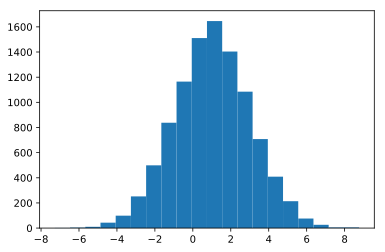

In [15]:
# ヒストグラムを表示し確率密度分布を確認
plt.hist(x, bins=20)

ついでなので、このヒストグラムと表式によって解析的に得られた値が正しいか確認してみます。

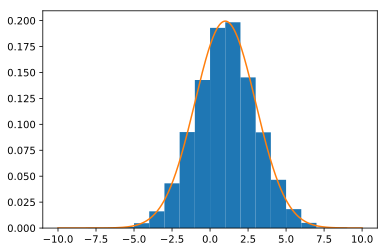

In [16]:
# ヒストグラムを正規化する
plt.hist(x, bins=20, density=1,range=(-10,10))

# 正規分布を計算しプロットしてみる
mu = 1
sigma = 2

def get_norm(x):
  import math
  return math.exp(-1 * (x - mu)**2 / 2 / sigma**2) / math.sqrt(2 * np.pi * sigma**2)

def get_norm_list(x):
  return [get_norm(i) for i in x]

x1 = np.linspace(-10,10,1000)
y1 = get_norm_list(x1)

plt.plot(x1,y1)

おおよそ一致していることがわかります。

### np.random.binomal(n,p[,size])
二項分布です。正の整数$n$と確率$p$をパラメタとして取ります。

$$
P(k)=\frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
$$

(array([ 100.,  337.,  815., 1331., 1721., 1807., 2635.,  662.,  341.,
         153.,   63.,   35.]),
 array([ 0.        ,  1.16666667,  2.33333333,  3.5       ,  4.66666667,
         5.83333333,  7.        ,  8.16666667,  9.33333333, 10.5       ,
        11.66666667, 12.83333333, 14.        ]),
 <a list of 12 Patch objects>)

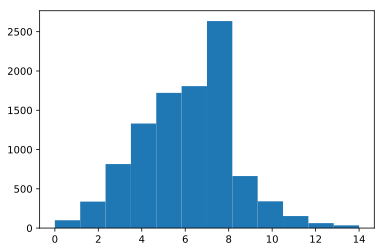

In [17]:
x = np.random.binomial(30,0.2,10000)

plt.hist(x, bins=12)

### np.random.poisson(lambda[,size])
ポアソン分布です。$\lambda$をパラメタとして取り、以下の様に表されます。
$$
P(k) = \frac{e^{-\lambda}\lambda^k}{k!}
$$

(array([ 389.,  842., 1419., 1839., 1780., 1416., 1028.,  648.,  356.,
         160.,   74.,   28.,   15.,    4.,    2.]),
 array([ 0.        ,  1.06666667,  2.13333333,  3.2       ,  4.26666667,
         5.33333333,  6.4       ,  7.46666667,  8.53333333,  9.6       ,
        10.66666667, 11.73333333, 12.8       , 13.86666667, 14.93333333,
        16.        ]),
 <a list of 15 Patch objects>)

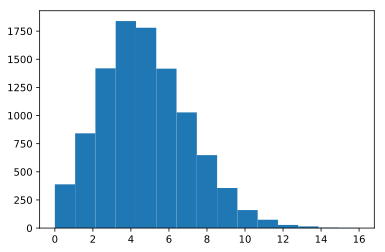

In [18]:
x = np.random.poisson(5,10000)

plt.hist(x, bins=15)

### np.random.beta(a,b[,size])
ベータ分布です。$\alpha$と$\beta$という二つのパラメタを取ります。

$$
P(x)=\frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}
$$

ここで$B(\alpha,\beta)$はベータ関数で、
$$
B(\alpha,\beta) = \int_0^1x^{\alpha-1}(1-x)^{\beta-1}dx
$$

(array([197., 570., 775., 916., 880., 988., 928., 934., 787., 685., 615.,
        490., 426., 288., 206., 154.,  82.,  55.,  18.,   6.]),
 array([0.00344225, 0.04987531, 0.09630837, 0.14274143, 0.18917449,
        0.23560755, 0.28204061, 0.32847367, 0.37490673, 0.42133979,
        0.46777285, 0.51420591, 0.56063897, 0.60707203, 0.65350509,
        0.69993815, 0.74637121, 0.79280427, 0.83923733, 0.88567039,
        0.93210345]),
 <a list of 20 Patch objects>)

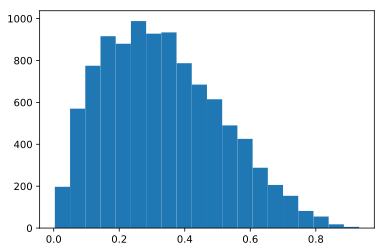

In [19]:
x = np.random.beta(2,4,10000)

plt.hist(x,bins=20)

### np.random.gamma(a,b[,size])
ガンマ分布です。$\alpha$と$\beta$の二つのパラメタを持ちます。表式は以下の通りです。

$$
P(x) = \frac{x^{\alpha - 1}\exp(-\frac{x}{\beta})}{\Gamma(\alpha)\beta^\alpha} \quad (x \geq 0)
$$

$\Gamma$はガンマ関数で

$$
\Gamma(x) = \int_0^\infty t^{x-1}e^{-t} dt \quad (x \geq 0)
$$

と定義される超関数である。

(array([7.280e+02, 1.951e+03, 2.248e+03, 1.848e+03, 1.290e+03, 7.900e+02,
        5.320e+02, 2.760e+02, 1.720e+02, 7.500e+01, 3.900e+01, 2.100e+01,
        1.600e+01, 6.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0.214581  ,  1.90909253,  3.60360406,  5.29811559,  6.99262712,
         8.68713865, 10.38165018, 12.07616171, 13.77067324, 15.46518477,
        17.1596963 , 18.85420783, 20.54871936, 22.24323089, 23.93774242,
        25.63225395, 27.32676548, 29.02127701, 30.71578854, 32.41030007,
        34.10481161]),
 <a list of 20 Patch objects>)

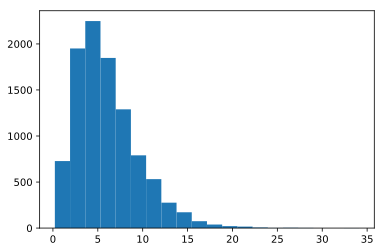

In [20]:
x = np.random.gamma(3,2,10000)

plt.hist(x, bins=20)

### np.random.multivariate_normal(mean, cov[, size, check_valid, tol])
平均と共分散行列を指定し、相関のある多次元の正規分布からサンプリングします。

共分散行列が

$$
\left(
  \begin{array}{cc}
    1 & 0 \\\\
    0 & 1 
  \end{array}
\right)
$$

の場合、無相関な二つの正規分布からサンプリングすることになります。

$$
\left(
  \begin{array}{cc}
    1 & 1 \\\\
    1 & 1 
  \end{array}
\right)
$$

で完全相関です。

$$
\left(
  \begin{array}{cc}
    1 & 0.5 \\\\
    0.5 & 1 
  \end{array}
\right)
$$

で共分散が0.5の二つの正規分布からのサンプリングになります。

$$
\left(
  \begin{array}{cc}
    1 & -0.7 \\\\
    -0.7 & 1 
  \end{array}
\right)
$$

で負の相関になります。

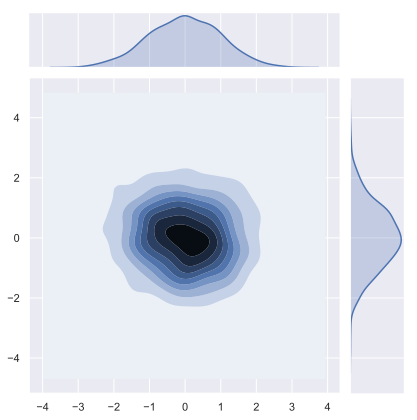

In [21]:
a = np.array([0,0])
b = np.array([[1,0],[0,1]])

sample = np.random.multivariate_normal(a,b,size=1000)

import seaborn as sns

sns.set(style='darkgrid')
sns.jointplot(x=sample[:,0], y=sample[:,1], kind='kde')

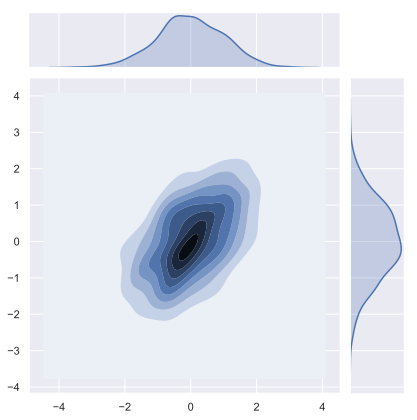

In [22]:
a = np.array([0,0])
b = np.array([[1,0.5],[0.5,1]])

sample = np.random.multivariate_normal(a,b,size=1000)
sns.jointplot(x=sample[:,0], y=sample[:,1], kind='kde')

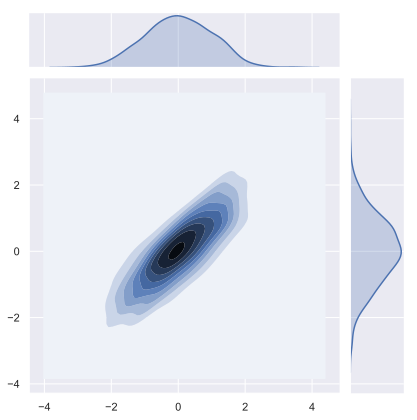

In [23]:
a = np.array([0,0])
b = np.array([[1,0.8],[0.8,1]])

sample = np.random.multivariate_normal(a,b,size=1000)
sns.jointplot(x=sample[:,0], y=sample[:,1], kind='kde')

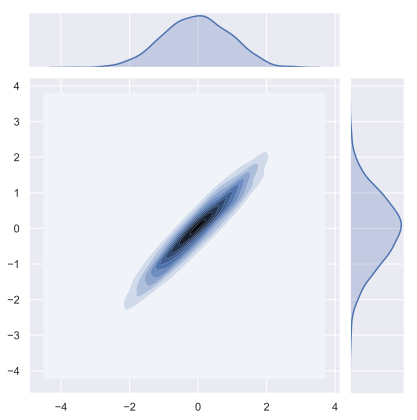

In [24]:
a = np.array([0,0])
b = np.array([[1,0.95],[0.95,1]])

sample = np.random.multivariate_normal(a,b,size=1000)
sns.jointplot(x=sample[:,0], y=sample[:,1], kind='kde')

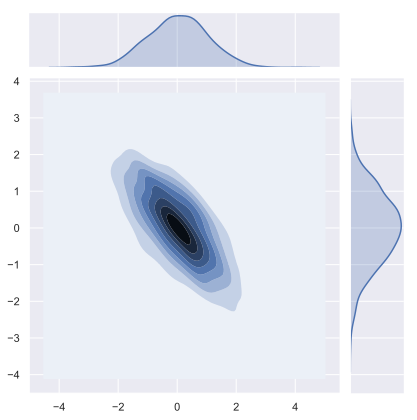

In [25]:
a = np.array([0,0])
b = np.array([[1,-0.7],[-0.7,1]])

sample = np.random.multivariate_normal(a,b,size=1000)
sns.jointplot(x=sample[:,0], y=sample[:,1], kind='kde')

機械学習に必要な確率分布は外にもたくさんありますが、numpyでのサンプリングはここまでにしておきます。より詳細には[scipy](/tags/scipy/)で説明します。